# Videos per Channel Statistics and Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = 'data/out/'
fn = 'yt_metadata_videos_per_channel.feather'
df_videos_per_channel = pd.read_feather(data_path + fn, use_threads=True)

In [2]:
df_videos_per_channel.head()

,index,channel_id,view_count_sum,view_count_mean,view_count_median,view_count_gmean,upload_date_count,upload_date_first,upload_date_last,upload_rate_
0,0,UC--24Q3_ZQeFmgJE-Um5QZQ,3291383.0,17414.724868,7025.0,8786.454129,189,2019-09-25,2015-11-29,7.386243
1,1,UC--2EbuIuBOGgGqPiJxi3rg,7999515.0,133325.250000,1878.5,2860.104738,60,2019-02-17,2013-05-04,35.250000
2,2,UC--3c8RqSfAqYBdDjIG3UNA,63626751.0,191071.324324,52412.0,64362.484523,333,2019-09-30,2008-07-07,12.318318
3,3,UC--3ozenTzry39-xMqAPQlw,5192527.0,120756.441860,41382.0,42856.515433,43,2018-10-14,2010-05-26,71.232558
4,4,UC--6E6EpybocdaNlPhvK_9A,9317278.0,300557.354839,159616.0,164875.241741,31,2019-07-25,2014-12-06,54.580645


In [3]:
df_videos_per_channel.drop(columns=['index'], inplace=True)
df_videos_per_channel.head()

,channel_id,view_count_sum,view_count_mean,view_count_median,view_count_gmean,upload_date_count,upload_date_first,upload_date_last,upload_rate_
0,UC--24Q3_ZQeFmgJE-Um5QZQ,3291383.0,17414.724868,7025.0,8786.454129,189,2019-09-25,2015-11-29,7.386243
1,UC--2EbuIuBOGgGqPiJxi3rg,7999515.0,133325.250000,1878.5,2860.104738,60,2019-02-17,2013-05-04,35.250000
2,UC--3c8RqSfAqYBdDjIG3UNA,63626751.0,191071.324324,52412.0,64362.484523,333,2019-09-30,2008-07-07,12.318318
3,UC--3ozenTzry39-xMqAPQlw,5192527.0,120756.441860,41382.0,42856.515433,43,2018-10-14,2010-05-26,71.232558
4,UC--6E6EpybocdaNlPhvK_9A,9317278.0,300557.354839,159616.0,164875.241741,31,2019-07-25,2014-12-06,54.580645


In [4]:
df_videos_per_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136470 entries, 0 to 136469
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   channel_id         136470 non-null  object        
 1   view_count_sum     136470 non-null  float64       
 2   view_count_mean    136468 non-null  float64       
 3   view_count_median  136468 non-null  float64       
 4   view_count_gmean   136288 non-null  float64       
 5   upload_date_count  136470 non-null  int64         
 6   upload_date_first  136470 non-null  datetime64[ns]
 7   upload_date_last   136470 non-null  datetime64[ns]
 8   upload_rate_       136470 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(1)
memory usage: 9.4+ MB


In [5]:
df_videos_per_channel.describe()

,view_count_sum,view_count_mean,view_count_median,view_count_gmean,upload_date_count,upload_rate_
count,1.364700e+05,1.364680e+05,1.364680e+05,1.362880e+05,136470.000000,136470.000000
mean,6.692200e+07,4.034903e+05,1.004496e+05,9.601030e+04,534.365018,17.054376
std,5.319736e+08,3.148812e+06,1.012852e+06,8.718177e+05,1862.522540,28.767056
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-217.500000
25%,3.101120e+06,1.551306e+04,2.244000e+03,2.768295e+03,66.000000,3.201446
50%,8.471262e+06,4.814521e+04,7.643750e+03,9.005006e+03,170.000000,8.037780
75%,2.700478e+07,1.699385e+05,2.996538e+04,3.327317e+04,430.000000,19.200000
max,8.672371e+10,3.678349e+08,1.282838e+08,1.282838e+08,141138.000000,1907.000000


In [6]:
# Set channel_id as index so we don't need to treat it as a special column every time
df_videos_per_channel.set_index('channel_id', inplace=True)
df_videos_per_channel.head()

,view_count_sum,view_count_mean,view_count_median,view_count_gmean,upload_date_count,upload_date_first,upload_date_last,upload_rate_
channel_id,,,,,,,,
UC--24Q3_ZQeFmgJE-Um5QZQ,3291383.0,17414.724868,7025.0,8786.454129,189,2019-09-25,2015-11-29,7.386243
UC--2EbuIuBOGgGqPiJxi3rg,7999515.0,133325.250000,1878.5,2860.104738,60,2019-02-17,2013-05-04,35.250000
UC--3c8RqSfAqYBdDjIG3UNA,63626751.0,191071.324324,52412.0,64362.484523,333,2019-09-30,2008-07-07,12.318318
UC--3ozenTzry39-xMqAPQlw,5192527.0,120756.441860,41382.0,42856.515433,43,2018-10-14,2010-05-26,71.232558
UC--6E6EpybocdaNlPhvK_9A,9317278.0,300557.354839,159616.0,164875.241741,31,2019-07-25,2014-12-06,54.580645


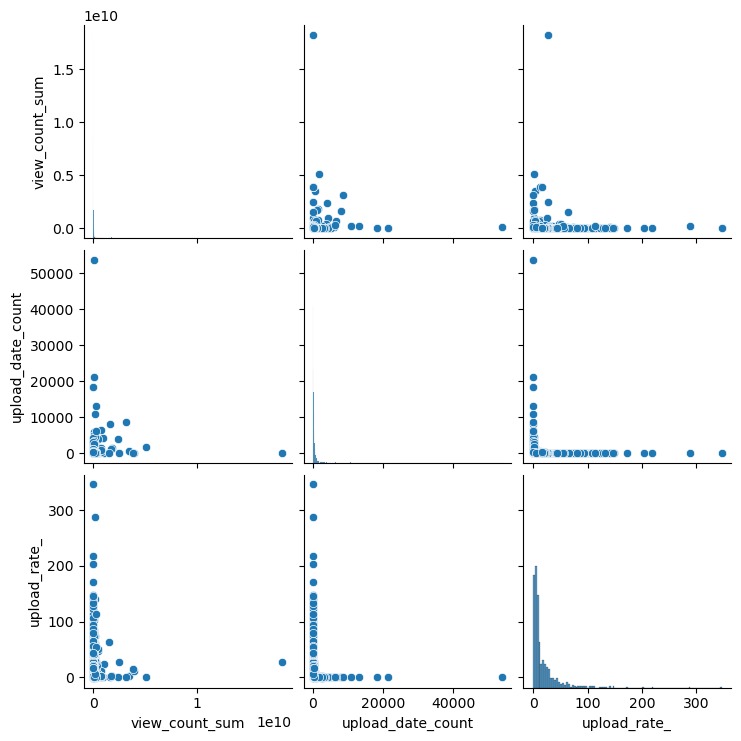

In [7]:
# One big plot with all the statistics, let's use histograms since we don't have categories now, we should also do pairplots
# pairplots here
# let's start with just a few columns
#sns.pairplot(df_videos_per_channel[['view_count_sum', 'upload_date_count', 'upload_rate_']])
# it's taking too long, let's see whatthe problem is
sns.pairplot(df_videos_per_channel[['view_count_sum', 'upload_date_count', 'upload_rate_']].head(1000)) # 2.6s for 1000 channels, ok, so it's slow
# fig, ax = plt.subplots(6, 3, figsize=(20, 30))
# for i, col in enumerate(df_videos_per_channel.columns[1:]):
#     sns.histplot(data=df_videos_per_channel, x=col, ax=ax[i//3, i%3], kde=True)
# plt.tight_layout()
# plt.suptitle('Videos Per Channel - All Years', fontsize=25, y=0.98)
# plt.subplots_adjust(top=0.95)
# save plot to data/out/plots
#plt.savefig('data/out/plots/yt_videos_per_channel.png')
plt.show()

Nb of NaNs in view_count_mean :
2
Nb of NaNs in view_count_median :
2
Nb of NaNs in view_count_gmean :
182


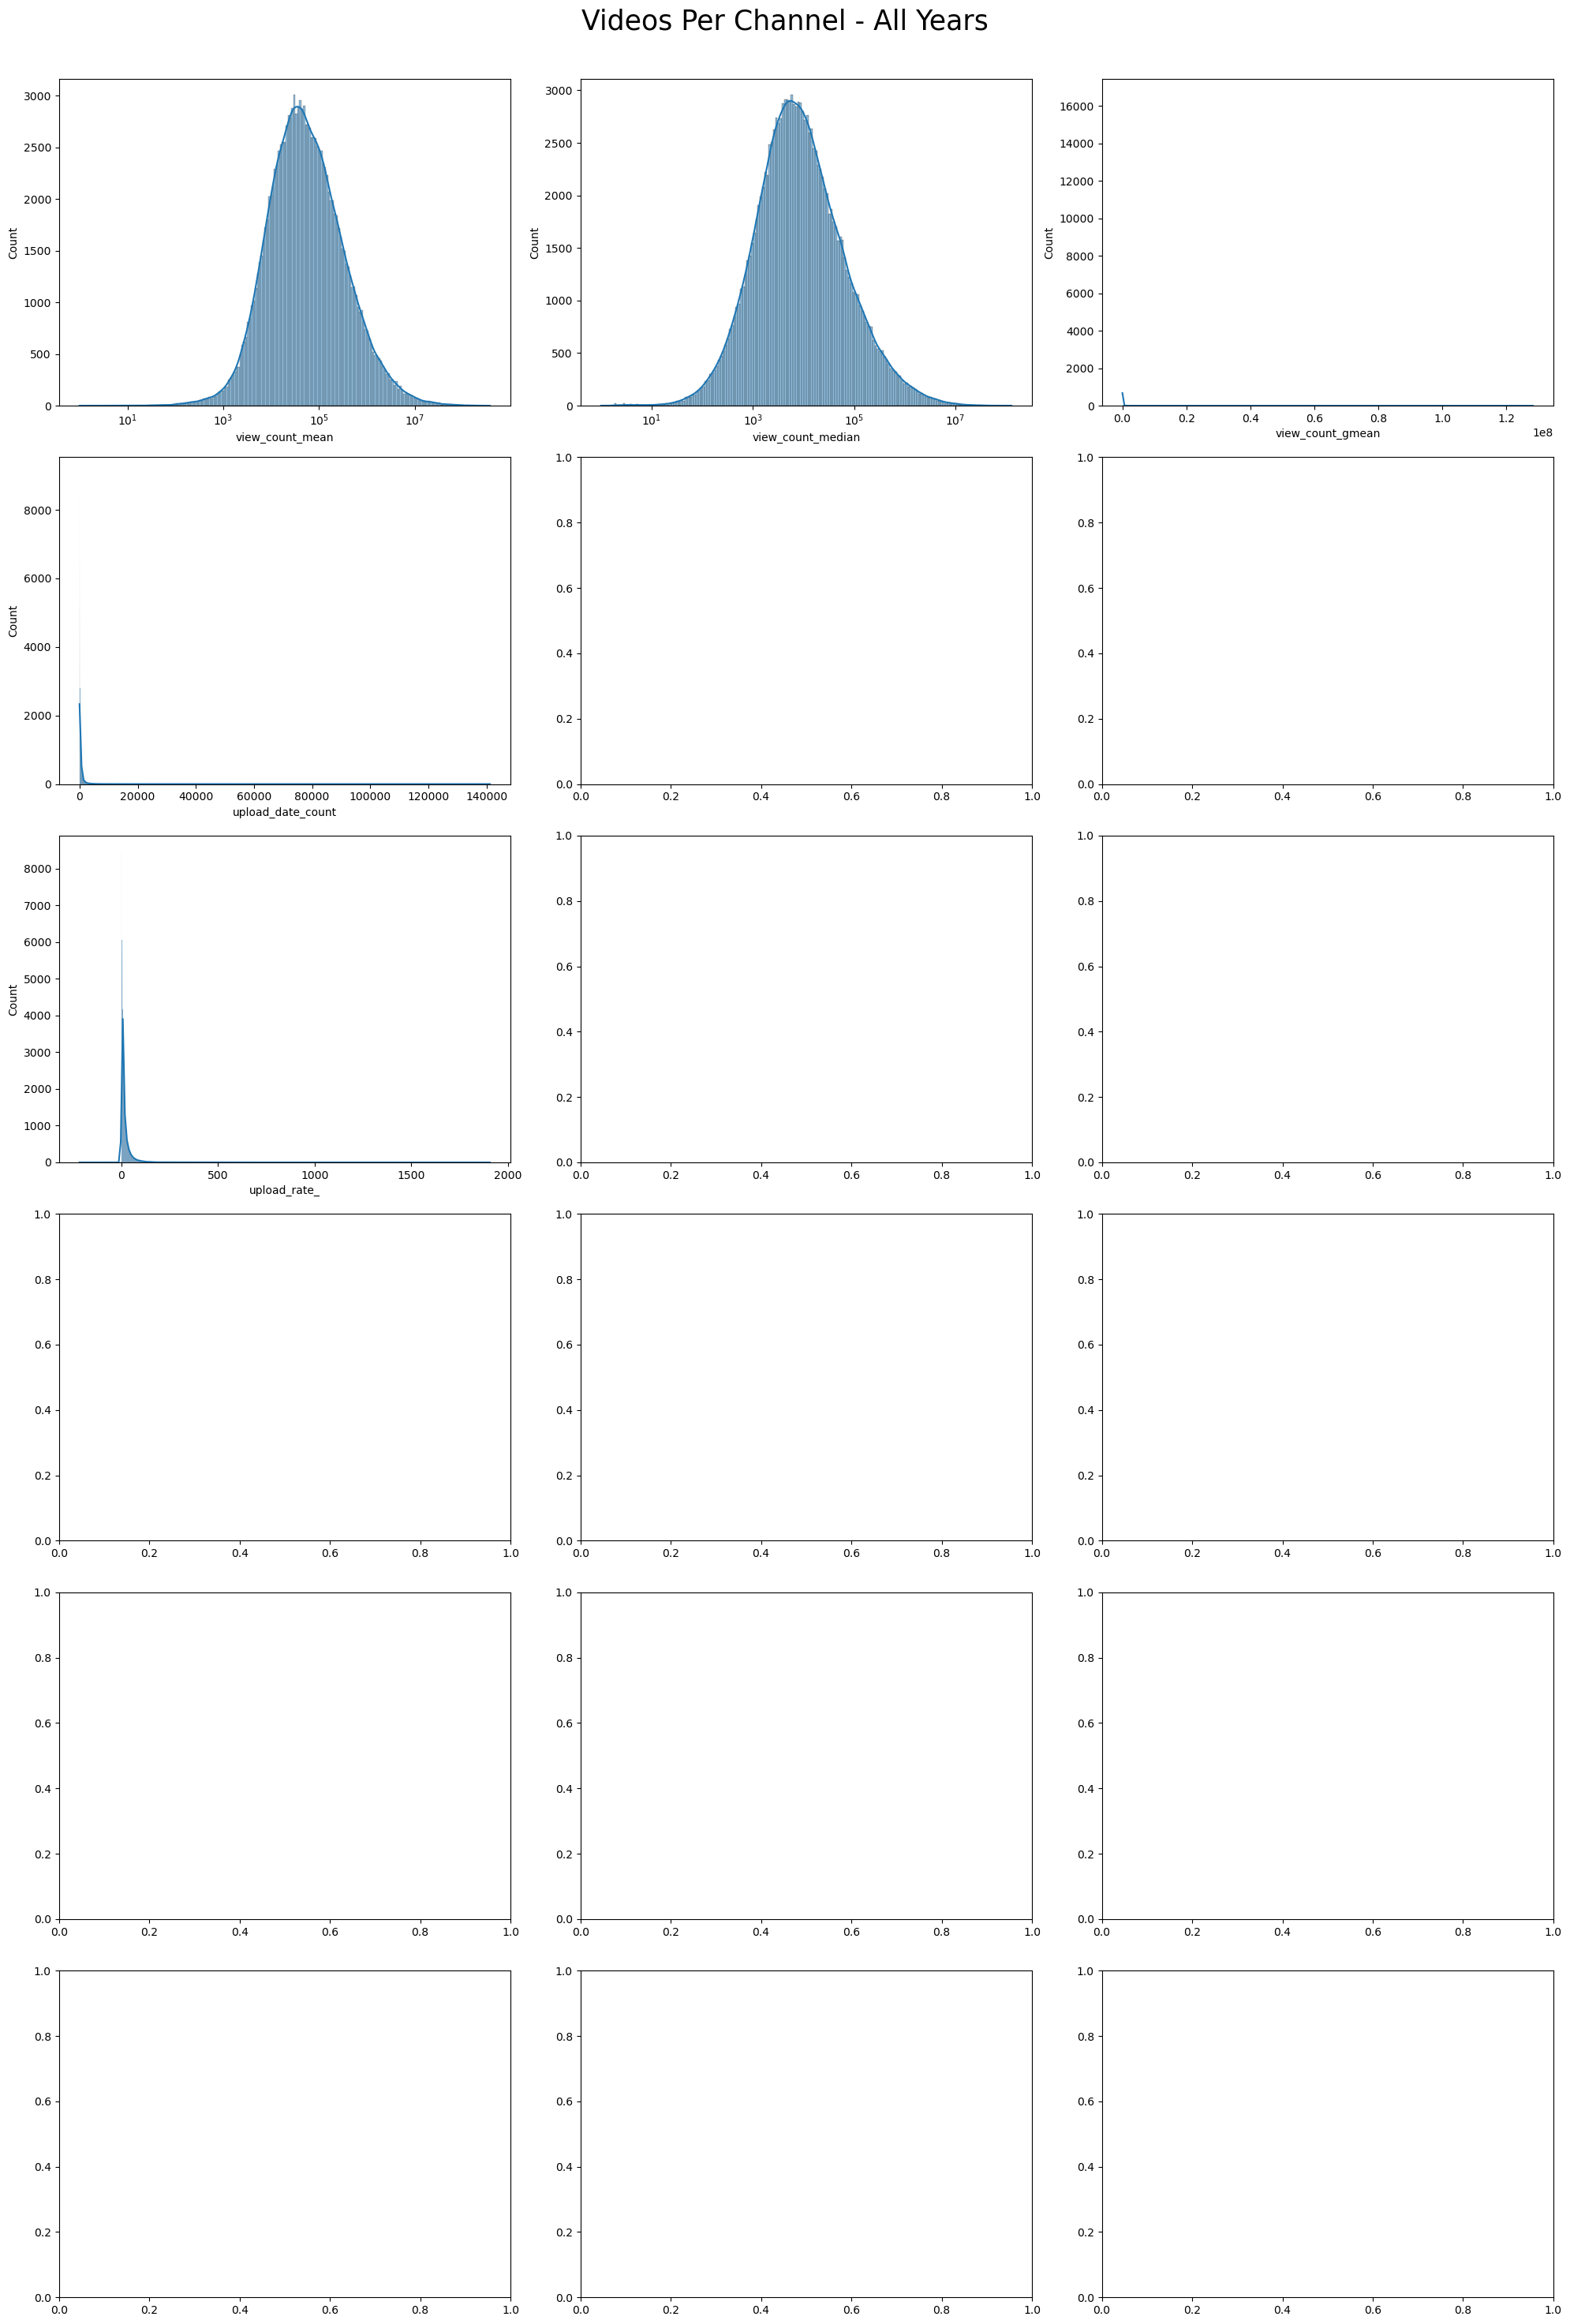

In [8]:
# Same but with log scale
fig, ax = plt.subplots(6, 3, figsize=(20, 30))
for i, col in enumerate(df_videos_per_channel.columns[1:]):
    # fix the 'autodetected range of [-inf, 10.938137864627864] is not finite' error
    # probably as before it's the gmeans that are causing the problem, use lin scale for those -- it's not
    # look for NaNs
    # Super hard-coed, but whatever for now.
    # ok they are a bit all over, lets just add 1 to all of them, let's keep upload rate linear as well as gmean and let's not plot first and last dates for now
    if df_videos_per_channel[col].isna().sum() > 0:
        print('Nb of NaNs in', col, ':')
        print(df_videos_per_channel[col].isna().sum()) # 2 NaNs in view_count_mean!... of course, when plugged into log scale it's -inf, we should do +1
    if col == 'view_count_gmean' or col == 'upload_rate_':
        sns.histplot(data=df_videos_per_channel, x=col, ax=ax[i//3, i%3], kde=True, log_scale=False)
    elif col == 'view_count_mean' or col == 'view_count_median' or col == 'view_count_sum':
        # we should do +1 to avoid -inf --- also for meadian and sum (but not for gmean since we already computed it badly before, we should go back and add that +1 actually
        sns.histplot(data=df_videos_per_channel[str(col)].apply(lambda x: x+1), ax=ax[i//3, i%3], kde=True, log_scale=True)
    else:
        if col == 'upload_date_first' or col == 'upload_date_last':
            continue
        sns.histplot(data=df_videos_per_channel, x=col, ax=ax[i//3, i%3], kde=True, log_scale=False)
plt.tight_layout()
plt.suptitle('Videos Per Channel - All Years', fontsize=25, y=0.98)
plt.subplots_adjust(top=0.95)
# save plot to data/out/plots
plt.savefig('data/out/plots/yt_videos_per_channel_log.png')
plt.show()

In [ ]:
# ok let's refine so we have a decent and useful plot, as of now it's not.

In [ ]:
data_path = 'data/out/Years_Metadata/categories/'
year = 2012
fn = '_categories.feather'
year_categories = []
for year in range(2012, 2020):
    year_categories.append(pd.read_feather(data_path + str(year) + fn, use_threads=True))
# let's call them with the year instead of the index
year_categories = dict(zip(range(2012, 2020), year_categories))

In [ ]:
# DO same in one big plot, but now for each year
year = 2012
for year in range(2012, 2020):
    fig, ax = plt.subplots(6, 3, figsize=(20, 30))
    for i, col in enumerate(year_categories[year].columns[1:]):
        # # if col is *_gmean we skip
        # if col[-5:] == '_gmean':
        #     continue
        sns.barplot(x="categories", y=col, data=year_categories[year], ax=ax[i//3, i%3])
        ax[i//3, i%3].set_xticklabels(ax[i//3, i%3].get_xticklabels(), rotation=40, ha="right")
        ax[i//3, i%3].set_title(col)
        if col == 'like_count_gmean' or col == 'dislike_count_gmean':
            ax[i//3, i%3].set_yscale('linear') # this is the problem - like and dislike count gmean are less than 0 (2017 has a negative value)
        else:
            ax[i//3, i%3].set_yscale('log')
    plt.tight_layout()
    #fig.suptitle('Categories - ' + str(year), fontsize=25, y=1.02, x=0.5)
    plt.suptitle('Categories - ' + str(year), fontsize=25, y=0.98, x=0.5)
    fig.subplots_adjust(top=0.95)
    # save plot to data/out/plots
    plt.savefig('data/out/plots/' + str(year) + '_categories'  + '.png') # it does not save the sup title as well... need to adjust top
    plt.show()